# Embeddings

https://www.youtube.com/watch?v=wSXGlvTR9UM

In [1]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/wSXGlvTR9UM?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')



In [2]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Merge, Flatten

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
/Users/home/anaconda3/envs/ML/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [3]:
df = pd.read_csv('../data/cmc.data',header=None,names=['Age','Education','H_education',
                                                     'num_child','Religion', 'Employ',
                                                     'H_occupation','living_standard',
                                                     'Media_exposure','contraceptive'])
df.head()

,Age,Education,H_education,num_child,Religion,Employ,H_occupation,living_standard,Media_exposure,contraceptive
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [4]:
df.isnull().any()

Age                False
Education          False
H_education        False
num_child          False
Religion           False
Employ             False
H_occupation       False
living_standard    False
Media_exposure     False
contraceptive      False
dtype: bool

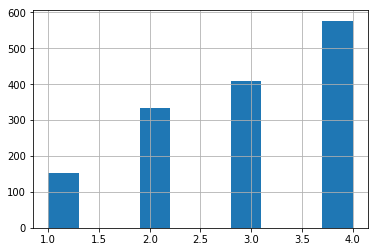

In [5]:
df.Education.hist()

In [6]:
df.shape

(1473, 10)

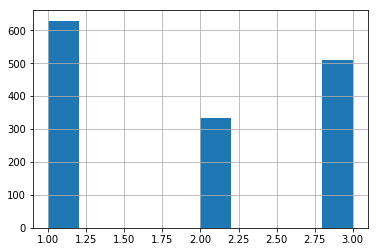

In [7]:
df.contraceptive.hist()

In [8]:
df.dtypes

Age                int64
Education          int64
H_education        int64
num_child          int64
Religion           int64
Employ             int64
H_occupation       int64
living_standard    int64
Media_exposure     int64
contraceptive      int64
dtype: object

In [11]:
def one_hot_encoding(idx):
    y = np.zeros((len(idx),max(idx)+1))
    y[np.arange(len(idx)), idx] = 1
    return y

In [10]:
scaler = StandardScaler()
df[['Age','num_child']] = scaler.fit_transform(df[['Age','num_child']]) 

In [12]:
x = df[['Age','num_child','Employ','Media_exposure']].values
y = one_hot_encoding(df.contraceptive.values-1)


In [15]:
liv_cats = df.living_standard.max()
edu_cats = df.Education.max()

In [17]:
liv = df.living_standard.values - 1
liv_one_hot = one_hot_encoding(liv)
edu = df.Education.values - 1
edu_one_hot = one_hot_encoding(edu)

In [18]:
# x = df[['Age','num_child','Employ','Media_exposure']].values
# y = one_hot_encoding(df.contraceptive.values-1)

# liv_cats = df.living_standard.max()
# edu_cats = df.Education.max()

# liv = df.living_standard.values - 1
# liv_one_hot = one_hot_encoding(liv)
# edu = df.Education.values - 1
# edu_one_hot = one_hot_encoding(edu)

train_x, test_x, train_liv, \
test_liv, train_edu, test_edu, train_y, test_y = train_test_split(x,liv_one_hot,edu_one_hot,y,test_size=0.1, random_state=1)

In [21]:
train_x.shape, train_edu.shape, train_liv.shape

((1325, 4), (1325, 4), (1325, 4))

In [22]:
train_x = np.hstack([train_x, train_edu, train_liv])
test_x = np.hstack([test_x, test_edu, test_liv])

In [23]:
train_x.shape

(1325, 12)

In [24]:
train_edu.shape

(1325, 4)

In [25]:
train_liv.shape

(1325, 4)

In [26]:
train_x.shape

(1325, 12)

## Model with One-hot encoding

In [ ]:
model = Sequential()
model.add(Dense(input_dim=train_x.shape[1],output_dim=12))
model.add(Activation('relu'))
model.add(Dense(output_dim=3))
model.add(Activation('softmax'))
model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, nb_epoch=100, verbose=2)

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
activation_1 (Activation)    (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 39        
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 195
Trainable params: 195
Non-trainable params: 0
_________________________________________________________________


Weight Dimensions:

In [29]:
for w in model.get_weights():
    print(w.shape)

(12, 12)
(12,)
(12, 3)
(3,)


In [30]:
model.evaluate(test_x, test_y, batch_size=256)

148/148 [==============================] - 0s 288us/step


[0.91856777667999268, 0.52027028799057007]

In [31]:
model.predict(test_x[:10])

array([[ 0.40902346,  0.27263299,  0.31834358],
       [ 0.58131951,  0.20289217,  0.21578833],
       [ 0.31818059,  0.23981734,  0.44200209],
       [ 0.290961  ,  0.31572962,  0.39330938],
       [ 0.48589596,  0.26598814,  0.24811587],
       [ 0.25126049,  0.4335646 ,  0.31517494],
       [ 0.16663633,  0.48484042,  0.34852332],
       [ 0.6458289 ,  0.11265027,  0.24152093],
       [ 0.67687982,  0.05958195,  0.26353824],
       [ 0.53912604,  0.14934954,  0.31152439]], dtype=float32)

In [22]:
liv

array([2, 3, 3, ..., 3, 1, 3])

## Model with embeddings

In [33]:
liv_cats

4

In [32]:
train_x, test_x, train_liv, \
test_liv, train_edu, test_edu, train_y, test_y = train_test_split(x,liv,edu,y,test_size=0.1, random_state=1)

In [35]:
# Input layer for religion
encoder_liv = Sequential()
encoder_liv.add(Embedding(liv_cats,2,input_length=1))
encoder_liv.add(Flatten())

# Input layer for religion
encoder_edu = Sequential()
encoder_edu.add(Embedding(edu_cats,2,input_length=1))
encoder_edu.add(Flatten())

# Input layer for triggers(x_b)
dense_x = Sequential()
dense_x.add(Dense(4, input_dim=x.shape[1]))

model = Sequential()
model.add(Merge([encoder_liv, encoder_edu, dense_x], mode='concat'))
# model.add(Activation('relu'))
model.add(Dense(output_dim=12))
model.add(Activation('relu'))
model.add(Dense(output_dim=3))
model.add(Activation('softmax'))

model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

/Users/home/anaconda3/envs/ML/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  app.launch_new_instance()
/Users/home/anaconda3/envs/ML/lib/python3.5/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=12)`
/Users/home/anaconda3/envs/ML/lib/python3.5/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=3)`


In [36]:
model.fit([train_liv[:,None], train_edu[:,None], train_x], train_y, nb_epoch=100, verbose=2)

/Users/home/anaconda3/envs/ML/lib/python3.5/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
 - 0s - loss: 1.6993 - acc: 0.3011
Epoch 2/100
 - 0s - loss: 1.1449 - acc: 0.3132
Epoch 3/100
 - 0s - loss: 1.1070 - acc: 0.3464
Epoch 4/100
 - 0s - loss: 1.0893 - acc: 0.3804
Epoch 5/100
 - 0s - loss: 1.0699 - acc: 0.4000
Epoch 6/100
 - 0s - loss: 1.0623 - acc: 0.4015
Epoch 7/100
 - 0s - loss: 1.0531 - acc: 0.4211
Epoch 8/100
 - 0s - loss: 1.0457 - acc: 0.4174
Epoch 9/100
 - 0s - loss: 1.0409 - acc: 0.4257
Epoch 10/100
 - 0s - loss: 1.0378 - acc: 0.4264
Epoch 11/100
 - 0s - loss: 1.0335 - acc: 0.4347
Epoch 12/100
 - 0s - loss: 1.0301 - acc: 0.4309
Epoch 13/100
 - 0s - loss: 1.0263 - acc: 0.4272
Epoch 14/100
 - 0s - loss: 1.0236 - acc: 0.4309
Epoch 15/100
 - 0s - loss: 1.0219 - acc: 0.4362
Epoch 16/100
 - 0s - loss: 1.0183 - acc: 0.4445
Epoch 17/100
 - 0s - loss: 1.0176 - acc: 0.4558
Epoch 18/100
 - 0s - loss: 1.0155 - acc: 0.4475
Epoch 19/100
 - 0s - loss: 1.0127 - acc: 0.4558
Epoch 20/100
 - 0s - loss: 1.0118 - acc: 0.4483
Epoch 21/100
 - 0s - loss: 1.0097 - acc: 0.4536
E

In [37]:
dense_x.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [38]:
encoder_liv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1, 2)              8         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2)                 0         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


In [40]:
encoder_edu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1, 2)              8         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2)                 0         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
merge_1 (Merge)              (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 12)                108       
_________________________________________________________________
activation_3 (Activation)    (None, 12)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 39        
_________________________________________________________________
activation_4 (Activation)    (None, 3)                 0         
Total params: 183
Trainable params: 183
Non-trainable params: 0
_________________________________________________________________


In [42]:
for w in model.get_weights():
    if w:
        print(w[0].shape)

(4, 2)
(4, 2)
(4, 4)
(8, 12)
(12, 3)


In [75]:
train_edu[:,None], train_liv[:,None]

(array([[3],
        [3],
        [1],
        ..., 
        [2],
        [1],
        [0]]), array([[3],
        [3],
        [0],
        ..., 
        [3],
        [3],
        [3]]))

In [56]:
a[0][0], a[0][0].shape

(array([[ 0.15692148, -0.54465717],
        [ 0.21701352, -0.22640347],
        [ 0.10284594,  0.01676768],
        [ 0.02353759,  0.28851801]], dtype=float32), (4, 2))

In [43]:
a = model.get_weights()
a

[[array([[ 0.15692148, -0.54465717],
         [ 0.21701352, -0.22640347],
         [ 0.10284594,  0.01676768],
         [ 0.02353759,  0.28851801]], dtype=float32)],
 [],
 [array([[-0.55586469, -0.77382845],
         [-0.35724109, -0.56051189],
         [-0.0728311 , -0.08787198],
         [ 0.38227242,  0.49498922]], dtype=float32)],
 [],
 [array([[-0.57601023,  0.50421578,  0.07752412,  0.79866284],
         [-0.16892873, -0.74922204, -0.81446004, -0.36228481],
         [ 0.68404311,  0.71968639, -0.61229873,  0.52547914],
         [ 0.12434465,  0.76771772, -0.15041605, -0.16731255]], dtype=float32),
  array([ 0.15696481, -0.23329066, -0.10003409,  0.15522388], dtype=float32)],
 [array([[-0.52829862,  0.44629076, -0.028669  ,  0.44989288,  0.17060408,
           0.29004079,  0.15839356,  0.44832721,  0.04850715,  0.44372445,
          -0.00498133, -0.84187531],
         [-0.10319579,  0.28611308, -0.35744926, -0.00445837, -1.1123116 ,
           0.15813172, -0.4148019 ,  0.58018124,

In [44]:
model.evaluate([test_liv[:,None], test_edu[:,None], test_x],test_y, batch_size=256)

148/148 [==============================] - 0s 532us/step


[0.93451815843582153, 0.53378379344940186]

In [65]:
tensor_name = next(filter(lambda x: x.name == 'merge_1', model.layers))

In [40]:
p = model.predict([test_liv[:,None], test_edu[:,None], test_x], batch_size=256)
p[:5]

array([[0.25250018, 0.31250244, 0.43499738],
       [0.8849396 , 0.0538322 , 0.06122812],
       [0.24710615, 0.16935235, 0.58354145],
       [0.42179266, 0.33125114, 0.24695621],
       [0.8215561 , 0.08922405, 0.08921982]], dtype=float32)

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
merge_1 (Merge)              (None, 12)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 12)                156       
_________________________________________________________________
activation_3 (Activation)    (None, 12)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 39        
_________________________________________________________________
activation_4 (Activation)    (None, 3)                 0         
Total params: 247
Trainable params: 247
Non-trainable params: 0
_________________________________________________________________


## Another model with just numeric data

In [42]:
model = Sequential()
model.add(Dense(4, input_dim=train_x.shape[1]))
model.add(Activation('relu'))
model.add(Dense(output_dim=3))
model.add(Activation('softmax'))

model.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, nb_epoch=100)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=3)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
1325/1325 [==============================] - 0s 282us/step - loss: 0.6501 - acc: 0.6629
Epoch 2/100
1325/1325 [==============================] - 0s 60us/step - loss: 0.6353 - acc: 0.6667
Epoch 3/100
1325/1325 [==============================] - 0s 55us/step - loss: 0.6303 - acc: 0.6667
Epoch 4/100
1325/1325 [==============================] - 0s 58us/step - loss: 0.6274 - acc: 0.6667
Epoch 5/100
1325/1325 [==============================] - 0s 47us/step - loss: 0.6254 - acc: 0.6667
Epoch 6/100
1325/1325 [==============================] - 0s 47us/step - loss: 0.6240 - acc: 0.6664
Epoch 7/100
1325/1325 [==============================] - 0s 50us/step - loss: 0.6228 - acc: 0.6664: 0s - loss: 0.6237 - acc: 0.666
Epoch 8/100
1325/1325 [==============================] - 0s 48us/step - loss: 0.6219 - acc: 0.6664
Epoch 9/100
1325/1325 [==============================] - 0s 53us/step - loss: 0.6212 - acc: 0.6662
Epoch 10/100
1325/1325 [==============================] - 0s 51us/step - los

In [ ]:
model.evaluate(test_x,test_y,batch_size=256)

In [76]:
dense_x.shape

AttributeError: 'Sequential' object has no attribute 'shape'

In [80]:
x_shape

NameError: name 'x_shape' is not defined

In [83]:
from keras import models
from keras import layers
model = Sequential()
model.add(layers.Dense(32, input_dim=x.shape[1]))
model.add(Activation('relu'))
# model.add(layers.Dense(32, activation='relu', input_dim=(784,)))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(Dense(output_dim=x.shape[1]))
model.add(Activation('relu'))

/Users/home/anaconda3/envs/ML/lib/python3.5/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=4)`
  # Remove the CWD from sys.path while we load stuff.


In [84]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 32)                160       
_________________________________________________________________
activation_8 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                330       
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 22        
_________________________________________________________________
dense_16 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 132       
_________________________________________________________________
activation_9 (Activation)    (None, 4)                 0         
Total para

In [88]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.fit(train_x, train_x, nb_epoch=5, verbose=2)

/Users/home/anaconda3/envs/ML/lib/python3.5/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/5
 - 0s - loss: 4.1084 - mean_absolute_error: 1.0040
Epoch 2/5
 - 0s - loss: 4.0882 - mean_absolute_error: 1.0087
Epoch 3/5
 - 0s - loss: 4.0879 - mean_absolute_error: 1.0062
Epoch 4/5
 - 0s - loss: 4.0911 - mean_absolute_error: 0.9971
Epoch 5/5
 - 0s - loss: 4.0945 - mean_absolute_error: 1.0168


In [89]:
model.get_weights()

[array([[ -3.72540563e-01,   8.10257420e-02,   3.89190078e-01,
           3.64130586e-01,  -4.40263152e-02,   2.58416444e-01,
          -1.00387391e-02,  -1.10920250e-01,   3.73262405e-01,
          -2.33875260e-01,   1.13800898e-01,  -9.32230949e-02,
           2.94514280e-02,  -2.55522132e-01,   4.65636313e-01,
          -2.71893710e-01,  -3.35407257e-01,   5.44135226e-04,
          -1.83203965e-01,   4.28307205e-01,   1.99259073e-01,
          -9.72418860e-02,   4.70039435e-02,  -2.78498590e-01,
          -2.75303900e-01,  -2.72001386e-01,   1.31765440e-01,
          -2.54290462e-01,   2.96056241e-01,   1.61228135e-01,
          -5.77920582e-05,   1.49517357e-01],
        [  2.29180932e-01,  -1.23666003e-01,   2.06723407e-01,
           3.84799391e-01,  -3.16018224e-01,  -3.71262163e-01,
           5.73465191e-02,   3.20272207e-01,   2.04473823e-01,
           7.37781823e-02,  -6.92881122e-02,   1.52130365e-01,
          -7.41906285e-01,  -2.29496107e-01,  -1.11399733e-01,
         

In [90]:
x.shape

(1473, 4)

In [93]:
len(model.get_weights())

10

In [97]:
[print(i, model.get_weights()[i].shape) for i in range(len(model.get_weights()))]

0 (4, 32)
1 (32,)
2 (32, 10)
3 (10,)
4 (10, 2)
5 (2,)
6 (2, 32)
7 (32,)
8 (32, 4)
9 (4,)


[None, None, None, None, None, None, None, None, None, None]